In [47]:
## Import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import prophet
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [2]:
# Loading the Dataset
dataset = pd.read_csv('./resources/delhi_aqi.csv')
dataset.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [56]:
dataset.columns

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'Date'], dtype='object')

In [5]:
# checking the missing value
dataset.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [6]:
# Converting the date column's datatype to datetime
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18776 non-null  datetime64[ns]
 1   co      18776 non-null  float64       
 2   no      18776 non-null  float64       
 3   no2     18776 non-null  float64       
 4   o3      18776 non-null  float64       
 5   so2     18776 non-null  float64       
 6   pm2_5   18776 non-null  float64       
 7   pm10    18776 non-null  float64       
 8   nh3     18776 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 1.3 MB


#### EDA

In [8]:
df = dataset.copy()

Dataset Distribution

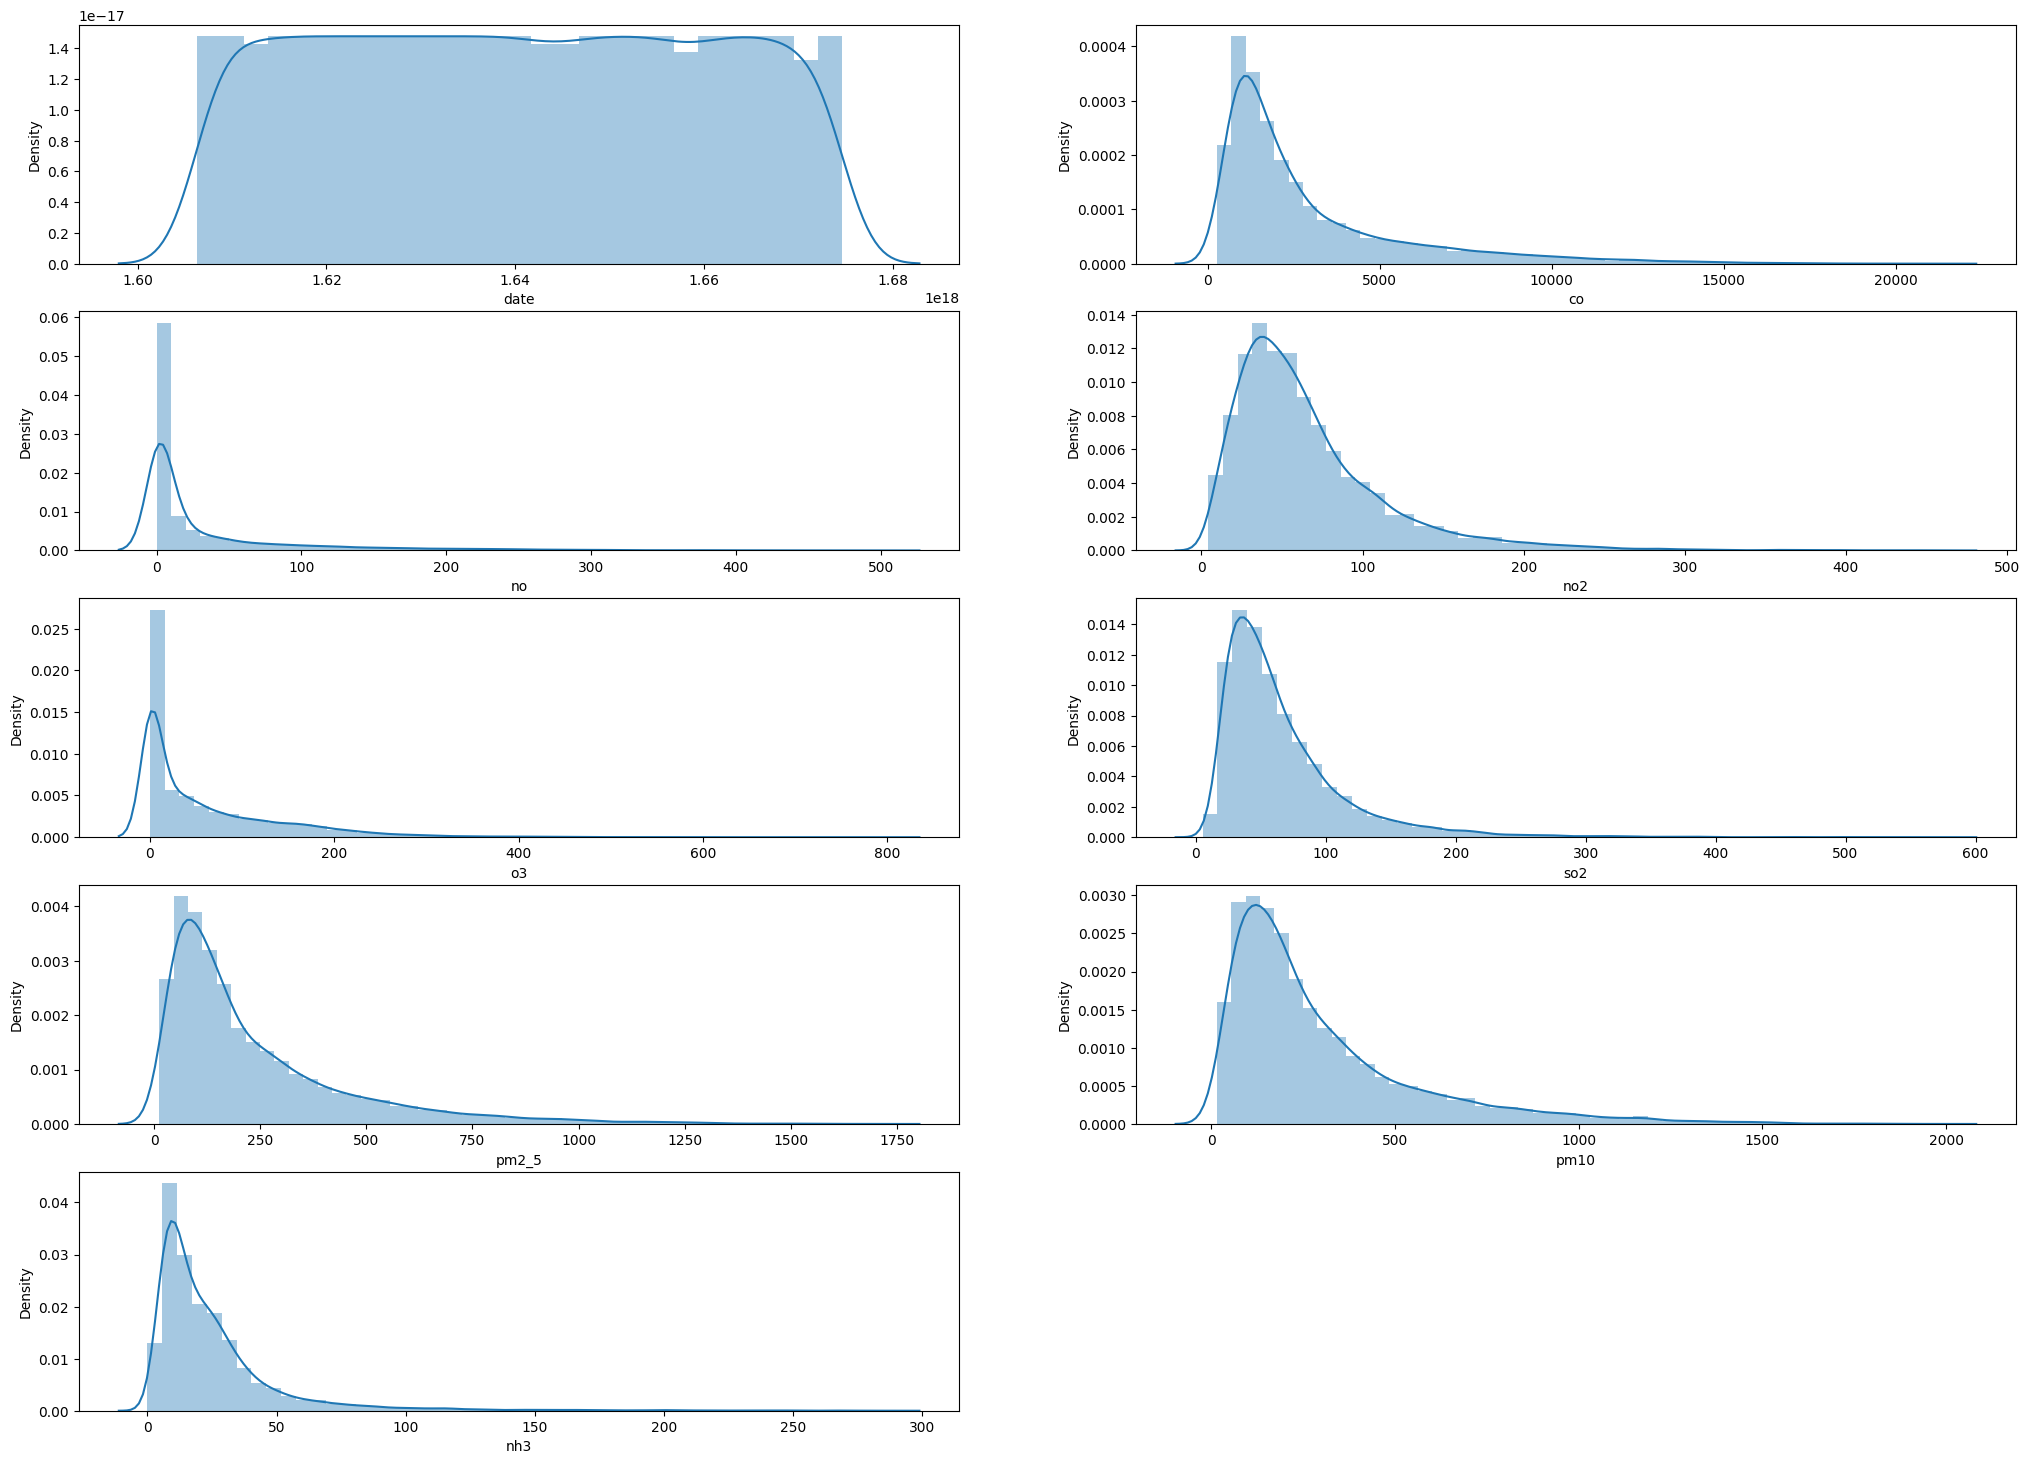

In [9]:
plot=1
plt.figure(figsize=(25,18))
for i in df.columns:
    plt.subplot(5,2,plot)
    sns.distplot(df[i])
    plot = plot+1

plt.show()

Working with the Date column

In [10]:
df['Date'] = df['date'].dt.date
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Weekday'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,Year,Month,Day,Weekday,hour
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25,2020,11,25,Wednesday,1
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25,2020,11,25,Wednesday,2
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020-11-25,2020,11,25,Wednesday,3
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020-11-25,2020,11,25,Wednesday,4
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020-11-25,2020,11,25,Wednesday,5


In [11]:
# Adding Season column - Summer,Autumn,Winter,Spring
def season_creation(x):
    if x in [2,3,4]:
        season = "Spring"
    elif x in [5,6]:
        season = "Summer"
    elif x in [7,8]:
        season = "Monsoon"
    elif x in [9,10]:
        season = "Autumn"
    elif x in[11,12,1]:
        season = "Winter"
    return season

In [12]:
df["Season"] = df["Month"].apply(season_creation)
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,Year,Month,Day,Weekday,hour,Season
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25,2020,11,25,Wednesday,1,Winter
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25,2020,11,25,Wednesday,2,Winter
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020-11-25,2020,11,25,Wednesday,3,Winter
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020-11-25,2020,11,25,Wednesday,4,Winter
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020-11-25,2020,11,25,Wednesday,5,Winter


#### Visualizing the Particulate Matter 2.5 on different weekdays in different season

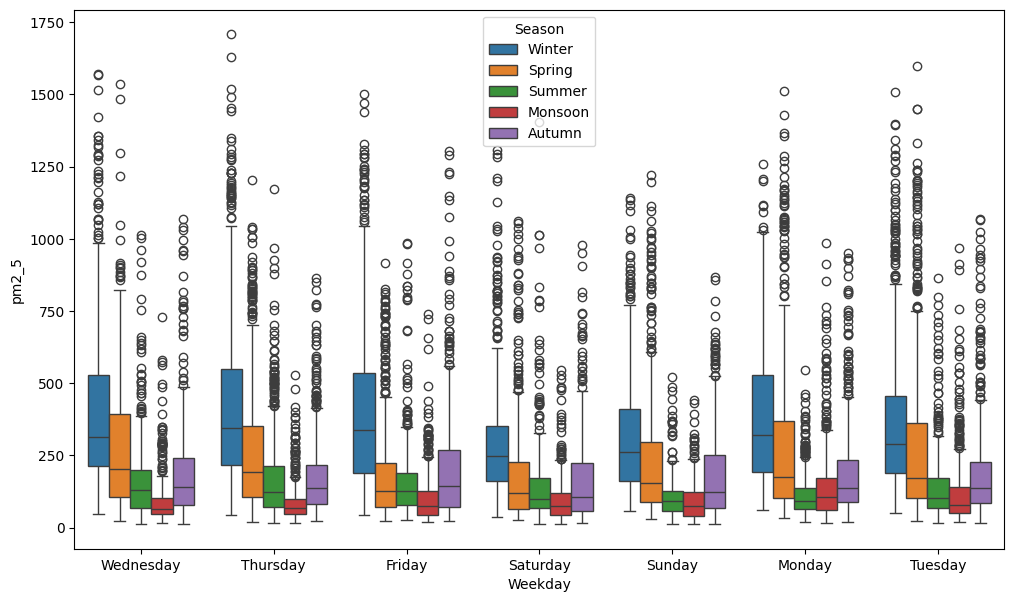

In [13]:
plt.figure(figsize = (12,7))
sns.boxplot(x = df['Weekday'], y = df['pm2_5'], hue = df['Season'])
plt.show()

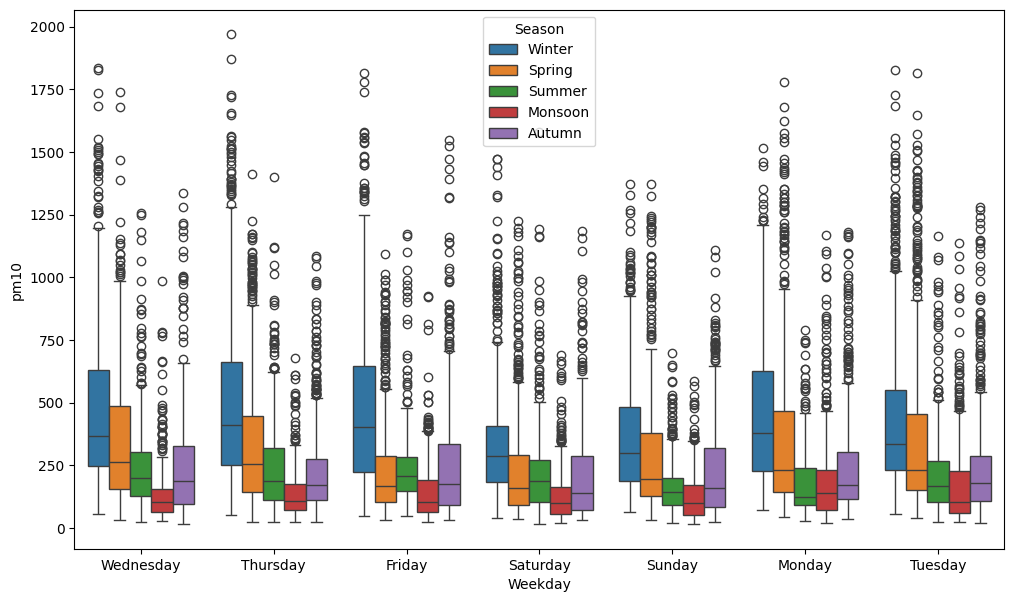

In [14]:
# Visualizing the Particulate Matter 10 on different weekdays in different season
plt.figure(figsize = (12,7))
sns.boxplot(x = df['Weekday'], y = df['pm10'], hue = df['Season'])
plt.show()

#### Visualize the monthly distribution of pollutants

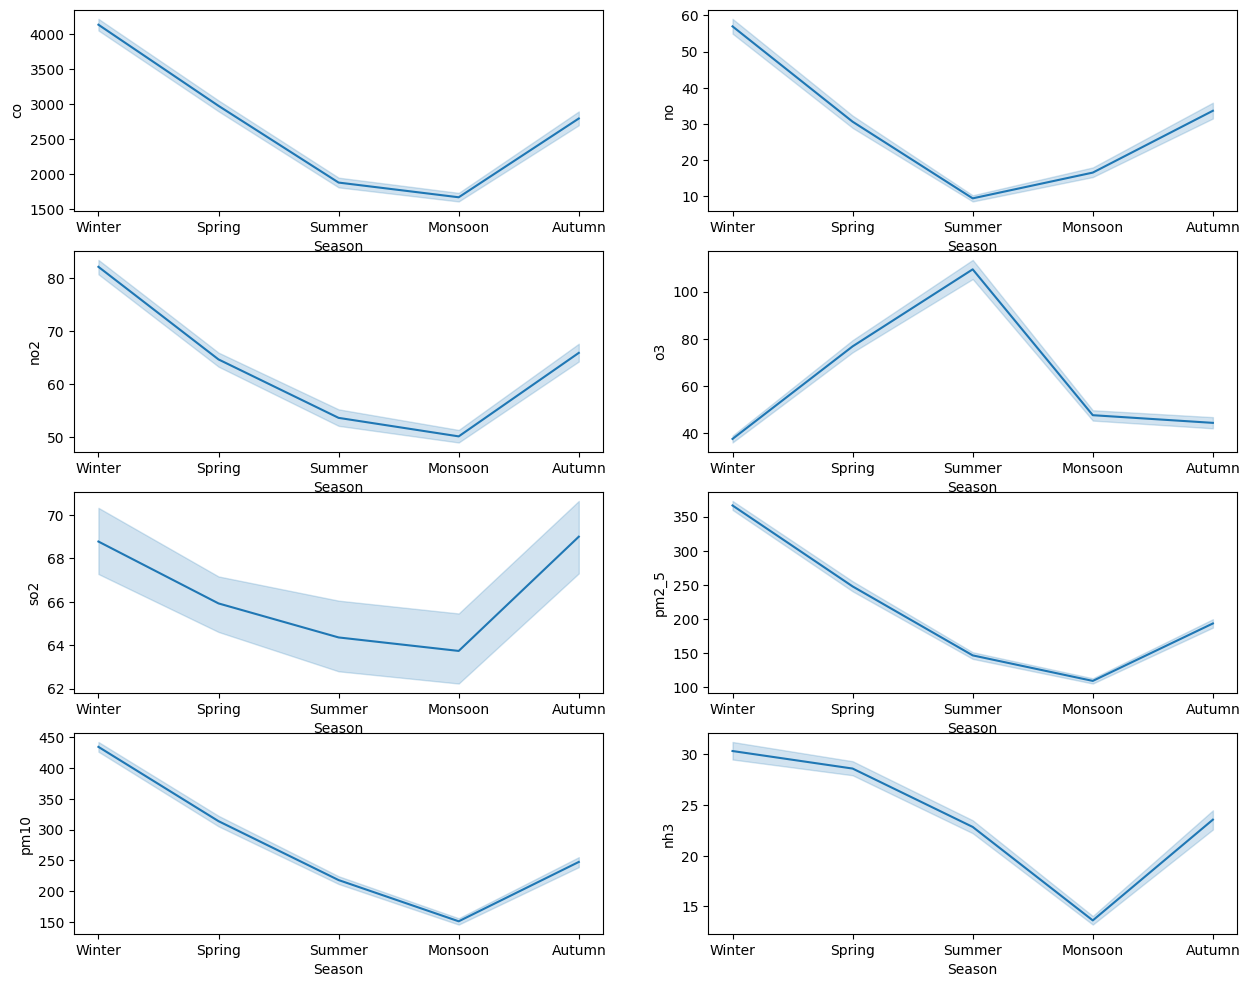

In [15]:
list1 = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
plot = 1
plt.figure(figsize =(15,12))
for i in list1:
    plt.subplot(4,2,plot)
    sns.lineplot(x = df['Season'], y = df[i])
    plot = plot+1
plt.show()

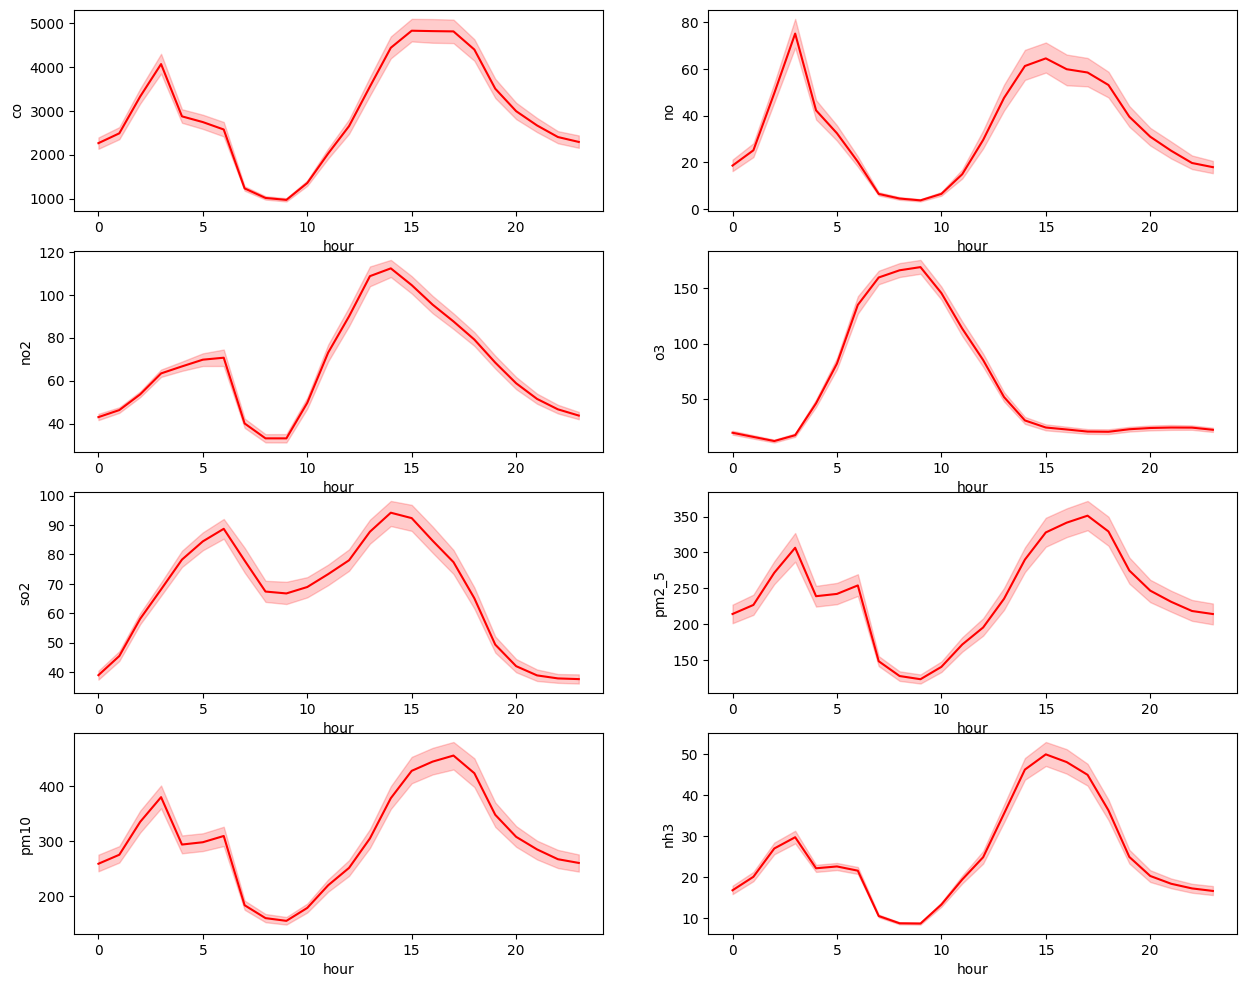

In [16]:
# Hourly Concentration trend of pollutants
list1 = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
plot = 1
plt.figure(figsize =(15,12))
for i in list1:
    plt.subplot(4,2,plot)
    sns.lineplot(x='hour', y = i, data = df, color = 'r')
    plot = plot+1
plt.show()

#### Predicting the value of PM2.5

In [18]:
dataset['Date'] = dataset['date'].dt.date

In [19]:
df_pred_pollution = dataset[['Date','pm2_5']]
df_pred_pollution.head()

,Date,pm2_5
0,2020-11-25,364.61
1,2020-11-25,420.96
2,2020-11-25,463.68
3,2020-11-25,454.81
4,2020-11-25,448.14


In [ ]:
df_pred_pollution.info()

In [20]:
# Converting the data type of Date column
df_pred_pollution['Date'] = pd.to_datetime(df_pred_pollution['Date'])
df_pred_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    18776 non-null  datetime64[ns]
 1   pm2_5   18776 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 293.5 KB


In [21]:
df_pred_pollution = df_pred_pollution.groupby('Date')['pm2_5'].sum().reset_index()
df_pred_pollution.head()

,Date,pm2_5
0,2020-11-25,7872.94
1,2020-11-26,4338.10
2,2020-11-27,2781.64
3,2020-11-28,4749.34
4,2020-11-29,7905.16


In [22]:
df_pred_cp = df_pred_pollution.copy()
df_pred_cp.set_index('Date', inplace=True)
df_pred_cp.head()

,pm2_5
Date,
2020-11-25,7872.94
2020-11-26,4338.10
2020-11-27,2781.64
2020-11-28,4749.34
2020-11-29,7905.16


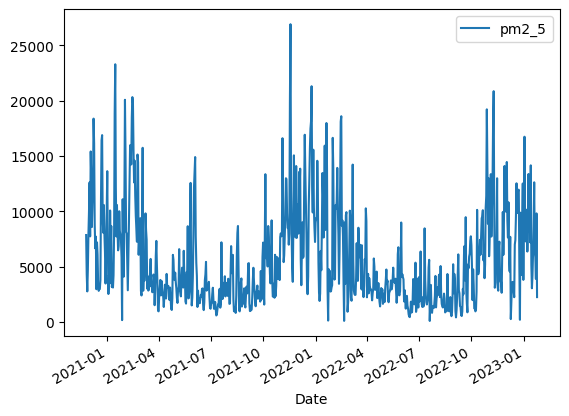

In [23]:
df_pred_cp.plot()
plt.show()

#### Durbin Watson Test

In [24]:
import statsmodels.api as sm
sm.stats.durbin_watson(df_pred_cp)

array([0.20840269])

#### Decomposition Component - Trend & Seasonality

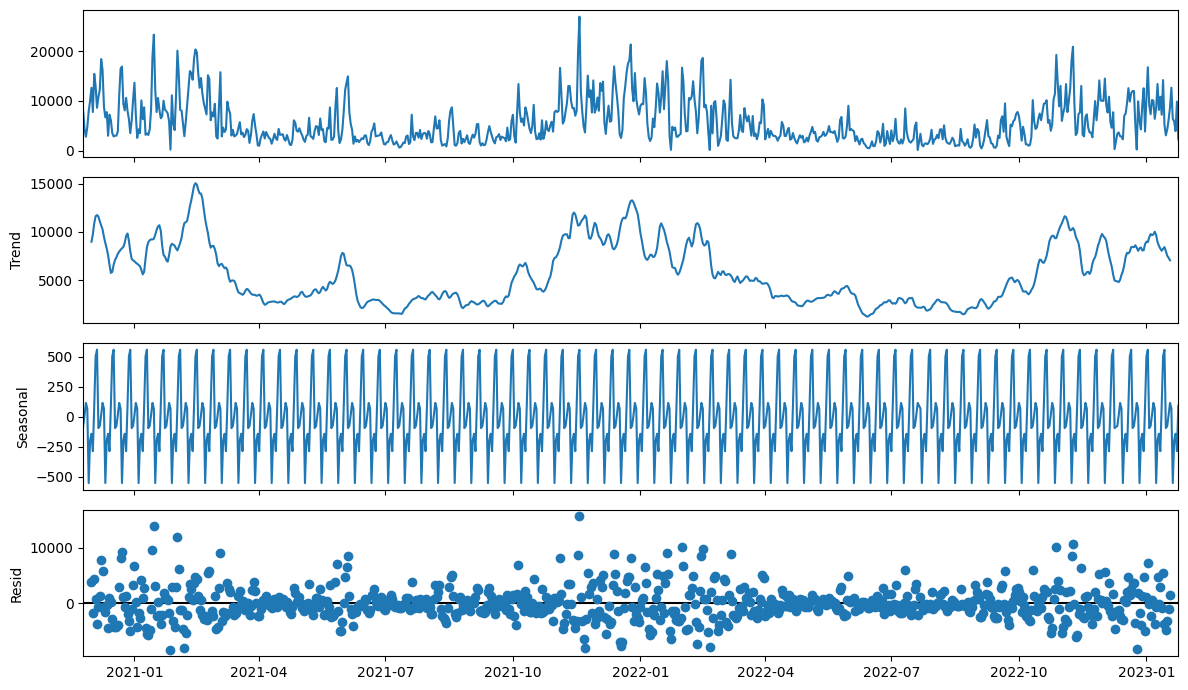

In [25]:
rcParams['figure.figsize'] = 12,7
decomposition_additive = seasonal_decompose(df_pred_cp, model = 'additive', period=12)
decomposition_additive.plot()
plt.show()

In [28]:
df_proph = df_pred_pollution.rename(columns={'Date':'ds', 'pm2_5':'y'})                   # Renaming the column names according to Prophet's guidelines
df_proph

,ds,y
0,2020-11-25,7872.94
1,2020-11-26,4338.10
2,2020-11-27,2781.64
3,2020-11-28,4749.34
4,2020-11-29,7905.16
...,...,...
784,2023-01-20,6378.28
785,2023-01-21,5880.71
786,2023-01-22,3910.64
787,2023-01-23,9829.13


In [31]:
m = Prophet()
model = m.fit(df_prophet)

17:50:47 - cmdstanpy - INFO - Chain [1] start processing
17:50:48 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [35]:
# Building Time Series Forecasting Model by using FB Prophet model
# Predicting 6 months data

fut_data = model.make_future_dataframe(periods = 180, freq='D')

In [39]:
prediction = model.predict(fut_data)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-25,5893.876526,5955.253137,14049.644009,5893.876526,5893.876526,4090.886048,4090.886048,4090.886048,422.812179,422.812179,422.812179,3668.073869,3668.073869,3668.073869,0.0,0.0,0.0,9984.762574
1,2020-11-26,5892.162306,5920.966178,14135.422814,5892.162306,5892.162306,4227.083893,4227.083893,4227.083893,620.028058,620.028058,620.028058,3607.055835,3607.055835,3607.055835,0.0,0.0,0.0,10119.246199
2,2020-11-27,5890.448086,5131.873630,13842.751981,5890.448086,5890.448086,3579.061974,3579.061974,3579.061974,34.429745,34.429745,34.429745,3544.632229,3544.632229,3544.632229,0.0,0.0,0.0,9469.510060
3,2020-11-28,5888.733866,4226.622638,12659.876579,5888.733866,5888.733866,2485.990465,2485.990465,2485.990465,-995.158643,-995.158643,-995.158643,3481.149108,3481.149108,3481.149108,0.0,0.0,0.0,8374.724332
4,2020-11-29,5887.019647,4410.429485,12900.455127,5887.019647,5887.019647,2541.083484,2541.083484,2541.083484,-875.940664,-875.940664,-875.940664,3417.024148,3417.024148,3417.024148,0.0,0.0,0.0,8428.103130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2023-07-19,4763.853018,-1615.842454,6753.443630,4754.341861,4773.660644,-2244.840612,-2244.840612,-2244.840612,422.812179,422.812179,422.812179,-2667.652791,-2667.652791,-2667.652791,0.0,0.0,0.0,2519.012406
965,2023-07-20,4762.697641,-1614.594846,6711.603741,4753.098094,4772.604433,-2086.652897,-2086.652897,-2086.652897,620.028058,620.028058,620.028058,-2706.680956,-2706.680956,-2706.680956,0.0,0.0,0.0,2676.044744
966,2023-07-21,4761.542264,-2302.280064,6303.948243,4751.853435,4771.552421,-2712.512051,-2712.512051,-2712.512051,34.429745,34.429745,34.429745,-2746.941796,-2746.941796,-2746.941796,0.0,0.0,0.0,2049.030213
967,2023-07-22,4760.386886,-3395.887021,5098.978427,4750.608818,4770.502347,-3781.655978,-3781.655978,-3781.655978,-995.158643,-995.158643,-995.158643,-2786.497335,-2786.497335,-2786.497335,0.0,0.0,0.0,978.730908


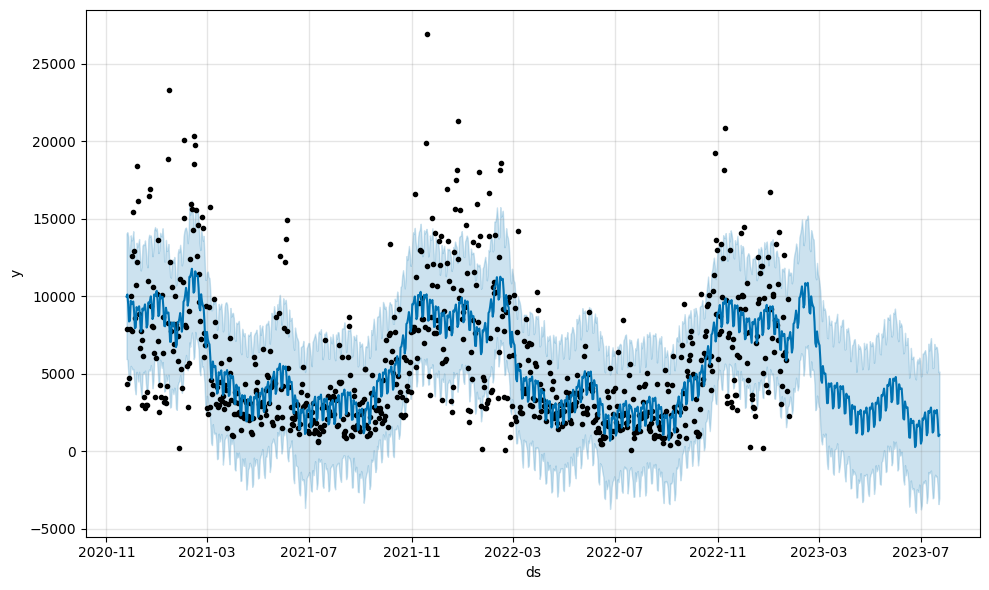

In [42]:
model.plot(prediction)
plt.show()

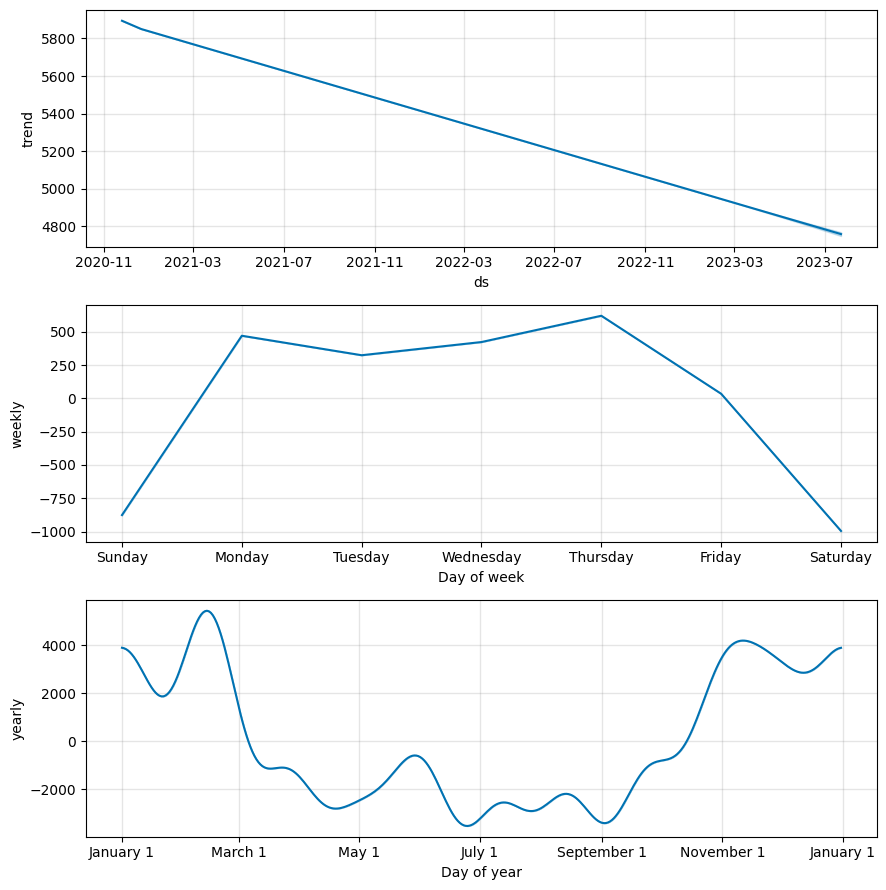

In [43]:
model.plot_components(prediction)
plt.show()

In [44]:
# cross validation :
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon='30 days', period = '15 days', initial='90 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/45 [00:00<?, ?it/s]

17:53:31 - cmdstanpy - INFO - Chain [1] start processing
17:53:31 - cmdstanpy - INFO - Chain [1] done processing
17:53:31 - cmdstanpy - INFO - Chain [1] start processing
17:53:31 - cmdstanpy - INFO - Chain [1] done processing
17:53:31 - cmdstanpy - INFO - Chain [1] start processing
17:53:31 - cmdstanpy - INFO - Chain [1] done processing
17:53:31 - cmdstanpy - INFO - Chain [1] start processing
17:53:31 - cmdstanpy - INFO - Chain [1] done processing
17:53:31 - cmdstanpy - INFO - Chain [1] start processing
17:53:31 - cmdstanpy - INFO - Chain [1] done processing
17:53:32 - cmdstanpy - INFO - Chain [1] start processing
17:53:32 - cmdstanpy - INFO - Chain [1] done processing
17:53:32 - cmdstanpy - INFO - Chain [1] start processing
17:53:32 - cmdstanpy - INFO - Chain [1] done processing
17:53:32 - cmdstanpy - INFO - Chain [1] start processing
17:53:32 - cmdstanpy - INFO - Chain [1] done processing
17:53:32 - cmdstanpy - INFO - Chain [1] start processing
17:53:32 - cmdstanpy - INFO - Chain [1]

#### Evaluating the predictions

In [46]:
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.391805e+07,3730.689617,2661.961434,0.714349,0.418214,0.543070,0.777446
1,4 days,1.548452e+07,3935.037013,2867.178121,0.740923,0.479118,0.593527,0.785406
2,5 days,1.496704e+07,3868.725623,2862.579338,0.757326,0.470026,0.609719,0.792869
3,6 days,1.313480e+07,3624.196976,2731.573482,0.757497,0.444206,0.612424,0.807131
4,7 days,1.442757e+07,3798.364063,2850.201410,1.697480,0.434510,0.655176,0.777778
5,8 days,1.465124e+07,3827.693224,2904.665533,1.667875,0.458543,0.678003,0.753731
6,9 days,1.618290e+07,4022.797854,3028.527388,2.168634,0.467190,0.702203,0.723881
7,10 days,1.659821e+07,4074.090496,3071.807393,1.336114,0.485830,0.698658,0.701493
8,11 days,1.703413e+07,4127.242894,3065.553865,1.379153,0.539217,0.688757,0.733499
9,12 days,1.715478e+07,4141.833229,3084.264657,0.983140,0.588187,0.688537,0.718740


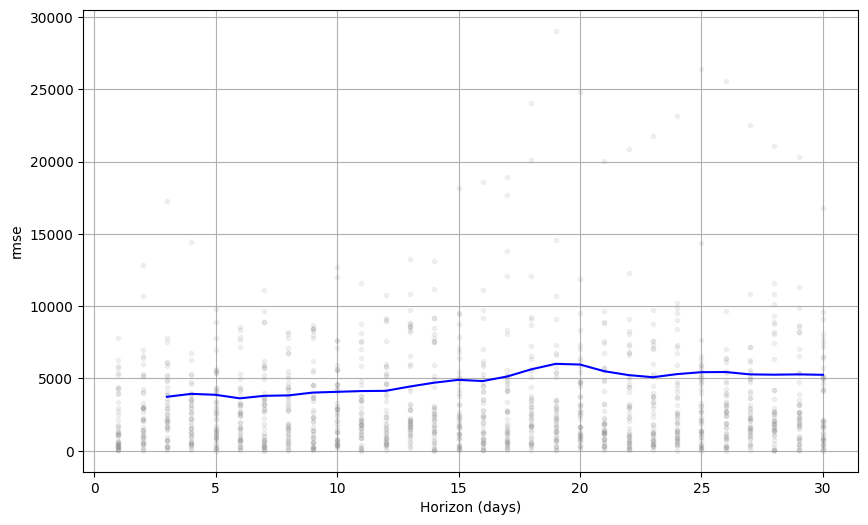

In [48]:
plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()